# Dataset




In [65]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from myworkspaceutils.datasets.micro_rna import MiRNA_GSE120584
warnings.filterwarnings('ignore')

In [45]:
data_dir = f"{Path.cwd().parent}/mirna_data"

In [46]:
dataset = MiRNA_GSE120584(data_dir)
sample_metadata, series_matrix = dataset.load_data()
series_matrix.shape, sample_metadata.shape

((2547, 1602), (1601, 5))

In [47]:
sample_metadata.describe()

,age,apoe4
count,1601.000000,1601.000000
mean,77.838851,0.411618
std,6.827812,0.581885
min,60.000000,0.000000
25%,73.000000,0.000000
50%,78.000000,0.000000
75%,83.000000,1.000000
max,95.000000,2.000000


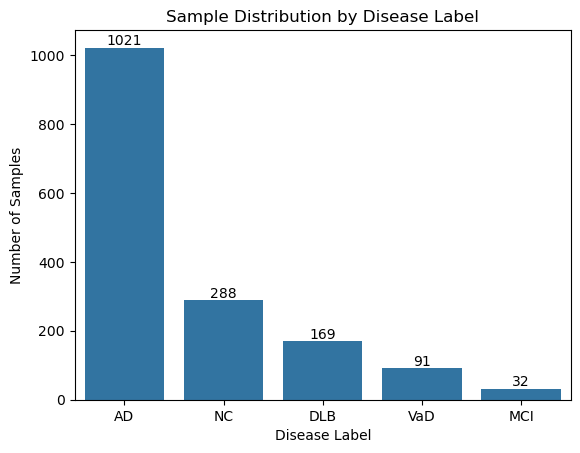

In [48]:
dataset.plot_label_distribution(sample_metadata)

### Split into Discovery and Validation cohorts

- Total samples: 1,601 (1021 AD + 91 VaD + 169 DLB + 32 MCI + 288 NC = 1,601)
- Discovery cohort: 786 individuals (511 AD + 46 VaD + 85 DLB + 144 NC
- Validation cohort: 783 individuals (510 AD + 45 VaD + 84 DLB + 144 NC 

In [49]:
discovery_cohort_metadata = pd.DataFrame(columns=sample_metadata.columns.values)
validation_cohort_metadata = pd.DataFrame(columns=sample_metadata.columns.values)


discovery_counts = {"AD":511, "VaD":46, "DLB": 85, "NC":144}
for i, row in tqdm(sample_metadata.iterrows()):
    if row['label'] == 'AD':
        if len(discovery_cohort_metadata[discovery_cohort_metadata['label'] == 'AD']) < discovery_counts['AD']:
            discovery_cohort_metadata = pd.concat([discovery_cohort_metadata, row.to_frame().T], ignore_index=True)
        else:
            validation_cohort_metadata = pd.concat([validation_cohort_metadata, row.to_frame().T], ignore_index=True)
    if row['label'] == 'VaD':
        if len(discovery_cohort_metadata[discovery_cohort_metadata['label'] == 'VaD']) < discovery_counts['VaD']:
            discovery_cohort_metadata = pd.concat([discovery_cohort_metadata, row.to_frame().T], ignore_index=True)
        else:
            validation_cohort_metadata = pd.concat([validation_cohort_metadata, row.to_frame().T], ignore_index=True)
    if row['label'] == 'DLB':
        if len(discovery_cohort_metadata[discovery_cohort_metadata['label'] == 'DLB']) < discovery_counts['DLB']:
            discovery_cohort_metadata = pd.concat([discovery_cohort_metadata, row.to_frame().T], ignore_index=True)
        else:
            validation_cohort_metadata = pd.concat([validation_cohort_metadata, row.to_frame().T], ignore_index=True)
    if row['label'] == 'NC':
        if len(discovery_cohort_metadata[discovery_cohort_metadata['label'] == 'NC']) < discovery_counts['NC']:
            discovery_cohort_metadata = pd.concat([discovery_cohort_metadata, row.to_frame().T], ignore_index=True)
        else:
            validation_cohort_metadata = pd.concat([validation_cohort_metadata, row.to_frame().T], ignore_index=True)


1601it [00:00, 3029.76it/s]


In [50]:
discovery_cohort_metadata.shape, validation_cohort_metadata.shape

((786, 5), (783, 5))

In [51]:
discovery_cohort_metadata.describe()

,sample_id,age,sex,apoe4,label
count,786,786,786,786,786
unique,786,35,2,3,4
top,GSM3403761,79,female,0,AD
freq,1,54,506,486,511


In [52]:
discovery_cohort_metadata['age'] = pd.to_numeric(discovery_cohort_metadata['age'], errors='coerce')
discovery_cohort_metadata['apoe4'] = pd.to_numeric(discovery_cohort_metadata['apoe4'], errors='coerce')

validation_cohort_metadata['age'] = pd.to_numeric(validation_cohort_metadata['age'], errors='coerce')
validation_cohort_metadata['apoe4'] = pd.to_numeric(validation_cohort_metadata['apoe4'], errors='coerce')

In [54]:
discovery_cohort_metadata.groupby('label').describe()

age                                                       apoe4  \
       count       mean       std   min    25%   50%    75%   max  count   
label                                                                      
AD     511.0  78.755382  6.055693  60.0  75.00  79.0  83.00  94.0  511.0   
DLB     85.0  79.011765  5.842158  63.0  75.00  79.0  83.00  93.0   85.0   
NC     144.0  73.166667  6.379600  61.0  69.00  72.0  77.00  93.0  144.0   
VaD     46.0  79.021739  6.273362  61.0  74.25  79.0  83.75  89.0   46.0   

                                                    
           mean       std  min  25%  50%  75%  max  
label                                               
AD     0.518591  0.616081  0.0  0.0  0.0  1.0  2.0  
DLB    0.364706  0.508196  0.0  0.0  0.0  1.0  2.0  
NC     0.215278  0.445069  0.0  0.0  0.0  0.0  2.0  
VaD    0.195652  0.401085  0.0  0.0  0.0  0.0  1.0

In [55]:
validation_cohort_metadata.groupby('label').describe()

age                                                      apoe4  \
       count       mean       std   min   25%   50%    75%   max  count   
label                                                                     
AD     510.0  79.737255  6.205516  60.0  76.0  81.0  84.00  95.0  510.0   
DLB     84.0  80.047619  6.224524  65.0  76.0  81.0  84.25  94.0   84.0   
NC     144.0  70.291667  5.969474  60.0  66.0  70.0  74.00  90.0  144.0   
VaD     45.0  79.133333  6.433577  62.0  74.0  80.0  84.00  89.0   45.0   

                                                     
           mean       std  min  25%  50%   75%  max  
label                                                
AD     0.484314  0.622711  0.0  0.0  0.0  1.00  2.0  
DLB    0.273810  0.499426  0.0  0.0  0.0  0.25  2.0  
NC     0.159722  0.403883  0.0  0.0  0.0  0.00  2.0  
VaD    0.311111  0.514438  0.0  0.0  0.0  1.00  2.0

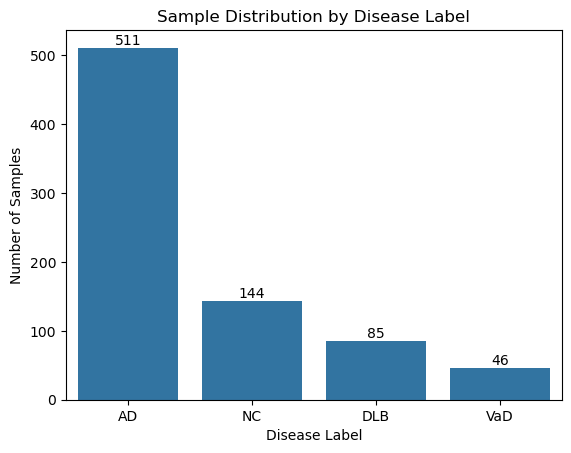

In [56]:
dataset.plot_label_distribution(discovery_cohort_metadata)


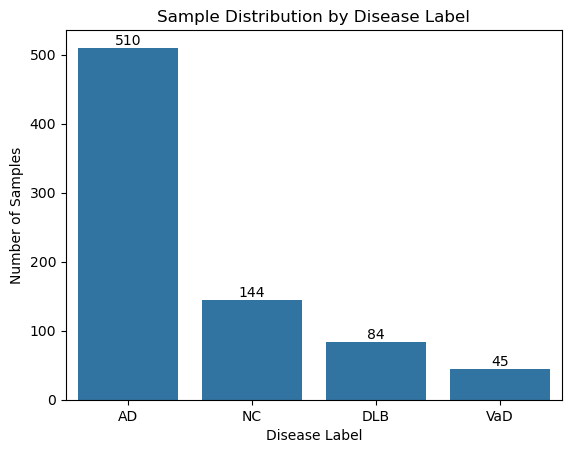

In [57]:
dataset.plot_label_distribution(validation_cohort_metadata)

In [58]:
discovery_cohort_metadata.groupby('label')['sex'].value_counts()

label  sex   
AD     female    369
       male      142
DLB    female     48
       male       37
NC     female     72
       male       72
VaD    male       29
       female     17
Name: count, dtype: int64

In [59]:
validation_cohort_metadata.groupby('label')['sex'].value_counts()

label  sex   
AD     female    345
       male      165
DLB    female     53
       male       31
NC     male       79
       female     65
VaD    male       25
       female     20
Name: count, dtype: int64

#### Discovery Cohort: Average Age, Sex, and APOE Information

| Phenotype | #Sample | Sex (M/F)| Average Age (std)  | Average APOEa (std) |
|:---|:---|:---|:---|:---|
| AD | 511 | 142/369  | 78.76 (+- 6.06) | 0.52 (+- 0.62)|
| DLB | 85 | 37/48  | 79.01 (+- 5.84) | 0.36 (+- 0.51)|
| NC | 144 | 72/72 | 73.17 (+- 6.37) | 0.22 (+- 0.45)|
| VaD | 46 | 17/29  | 79.02 (+- 6.27) | 0.20 (+- 0.40)|

#### Validation Cohort: Average Age, Sex, and APOE Information 

| Phenotype | #Sample | Sex (M/F) | Average Age (std)  | Average APOEa (std) |
|:---|:---|:---|:---|:---|
| AD | 510 | 165/345 | 79.73 (+- 6.21) | 0.47 (+- 0.62)|
| DLB | 84 | 31/53 | 80.04 (+- 6.22) | 0.30 (+- 0.50)|
| NC | 144 | 65/79 | 70.29 (+- 5.97) | 0.15 (+- 0.40)|
| VaD | 45 | 20/25 | 79.13 (+- 6.43) | 0.18 (+- 0.51)|

## Prepare Expression matrices for discovery and validation matrices

In [60]:
data_columns_discovery = list(discovery_cohort_metadata['sample_id'].values)
data_columns_validation = list(validation_cohort_metadata['sample_id'].values)

In [62]:
data_columns = series_matrix.columns[1:]
discovery_cols = ["ID_REF"] + data_columns_discovery
validation_cols = ["ID_REF"] + data_columns_validation

In [63]:
# Split into discovery and validation_cohort
discovery_cohort = series_matrix[discovery_cols]
validation_cohort  = series_matrix[validation_cols]

In [64]:
discovery_cohort.shape, validation_cohort.shape

((2547, 787), (2547, 784))

In [70]:
discovery_cohort.head()

,ID_REF,GSM3403761,GSM3403762,GSM3403763,GSM3403764,GSM3403765,GSM3403766,GSM3403767,GSM3403768,GSM3403769,...,GSM3405307,GSM3405308,GSM3405309,GSM3405310,GSM3405311,GSM3405312,GSM3405313,GSM3405314,GSM3405315,GSM3405316
0,MIMAT0000062,2.307579,1.503044,1.549877,1.560269,3.179096,4.319297,0.575922,-0.180237,1.491916,...,2.150476,0.423635,2.955279,2.559454,3.783569,1.933115,1.030954,1.762206,0.667372,1.426354
1,MIMAT0000063,2.307579,2.505380,1.983125,1.560269,3.302472,4.319297,1.964171,0.697365,1.491916,...,2.150476,0.595411,2.289413,2.559454,4.625250,2.711992,2.645288,1.762206,1.561172,2.336471
2,MIMAT0000064,2.307579,1.503044,1.549877,1.560269,3.179096,4.319297,0.575922,-0.180237,1.491916,...,2.150476,0.423635,1.619488,2.559454,4.051722,3.209037,1.030954,1.762206,0.667372,1.426354
3,MIMAT0000065,2.307579,1.503044,1.549877,1.560269,3.179096,4.319297,0.575922,-0.180237,1.491916,...,2.150476,0.423635,1.619488,2.559454,3.484287,1.933115,1.030954,1.762206,0.667372,1.426354
4,MIMAT0000066,2.307579,1.503044,1.549877,2.232974,4.793470,4.319297,0.575922,-0.180237,1.491916,...,2.307032,1.524827,1.619488,2.559454,1.247390,1.933115,1.734956,1.762206,1.533553,1.426354
